In [34]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score,confusion_matrix,plot_roc_curve
from matplotlib import pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_csv('/content/SAheart.csv',index_col=0)
df.head(5)

,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
sbp,,,,,,,,,
160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si


In [36]:
df.describe()

,tobacco,ldl,adiposity,typea,obesity,alcohol,age
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017
std,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956
min,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000
25%,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000
50%,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000
75%,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000
max,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000


In [37]:
df.drop('famhist',axis=1,inplace=True)

In [38]:
seed=101
y=df.pop('chd')
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.2,random_state=seed)

In [39]:
model=LogisticRegression(solver='liblinear',random_state=0)
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

In [41]:
train_score=model.score(x_train,y_train)
train_score

0.7317073170731707

In [42]:
test_score=model.score(x_test,y_test)
test_score

0.6881720430107527

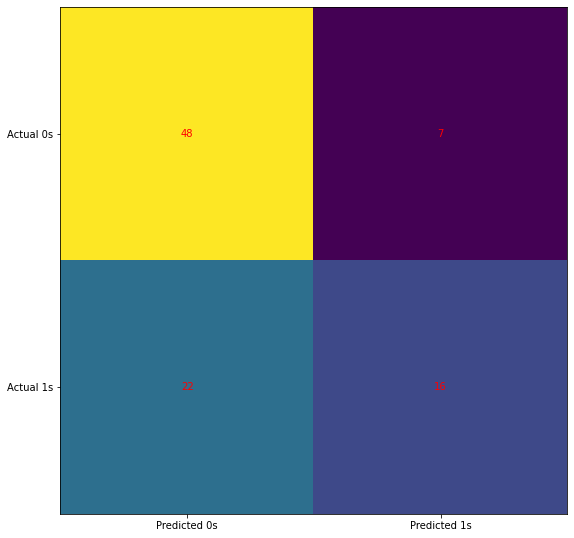

In [43]:
cm=confusion_matrix(y_test,y_test_pred)
fig,ax=plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.tight_layout()
plt.show()
plt.savefig("cm.png",dpi=120) 
plt.close()

In [44]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

          No       0.69      0.87      0.77        55
          Si       0.70      0.42      0.52        38

    accuracy                           0.69        93
   macro avg       0.69      0.65      0.65        93
weighted avg       0.69      0.69      0.67        93



In [45]:
roc_auc_score(y_test,model.predict_proba(x_test)[:,1])

0.7736842105263158

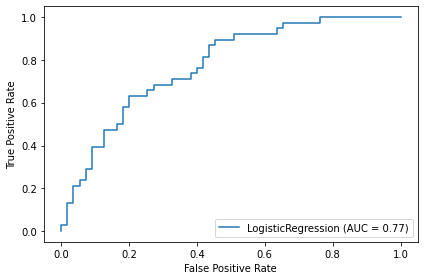

In [46]:
model_roc=plot_roc_curve(model,x_test,y_test)
plt.tight_layout()
plt.show()
plt.savefig("roc.png",dpi=120) 
plt.close()